In [1]:
# figures and captions
%matplotlib inline

from pathlib import Path
import os

HOME = str(Path.home())
PROJECTS = os.path.join(HOME, "projects")
WORKSPACE = os.path.join(HOME, "workspace")

In [2]:
JUPYTER = os.path.join(WORKSPACE, "jupyter")
PHYSCHEM = os.path.join(JUPYTER, "physchem") 
PHYSCHEM_IMAGES = os.path.join(PHYSCHEM, "images") 
PHYSCHEM_HTML = os.path.join(PHYSCHEM, "html") 

In [3]:
BATTERY = os.path.join(PROJECTS, "open-battery")
PROJECT_DIR = os.path.join(PHYSCHEM, "liion")
# os.chdir(PROJECT_DIR)
# os.listdir()

In [4]:
import glob
os.chdir(PROJECT_DIR)
figures = glob.glob("PMC*/sections/fig*/*.xml")
print(len(figures))

163


In [5]:
# https://pypi.org/project/pytesseract/
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

print("begin tesseract")

# If you don't have tesseract executable in your PATH, include the following:
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
print("end tesseract")


begin tesseract
end tesseract


In [6]:
os.chdir(PHYSCHEM)
from PIL import Image

print(os.getcwd())
test_png = os.path.join(PHYSCHEM_IMAGES, 'capacitycycle.png')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage.viewer import ImageViewer

image = Image.open(test_png, 'r')

# viewer = ImageViewer(image)
# viewer.show()
tesseract_strings = pytesseract.image_to_string(Image.open(test_png))
print(tesseract_strings)

/Users/pm286/workspace/jupyter/physchem


/opt/anaconda3/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


Specific capacity (mA hg’)

350

wo
So
oO

250

200

150

100

a
oO

500

1000
Cycle number

1500

 

2000



In [7]:
# In order to bypass the image conversions of pytesseract, just use relative or absolute image path
# NOTE: In this case you should provide tesseract supported images or tesseract will return error
# print(pytesseract.image_to_string('test.png'))

# Batch processing with a single file containing the list of multiple image file paths
# print(pytesseract.image_to_string('images.txt'))

# Timeout/terminate the tesseract job after a period of time
"""
try:
    print(pytesseract.image_to_string('test.jpg', timeout=2)) # Timeout after 2 seconds
    print(pytesseract.image_to_string('test.jpg', timeout=0.5)) # Timeout after half a second
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    pass
"""
# Get bounding box estimates
bboxes = pytesseract.image_to_boxes(Image.open(test_png))
print(bboxes[:100], "\n...\n", bboxes[-100:])

S 166 0 184 0 0
p 169 0 199 0 0
e 188 0 203 0 0
c 205 0 221 0 0
i 223 0 238 0 0
f 241 0 244 0 0
i 24 
...
 663 76 0
~ 126 94 799 640 0
2 758 52 774 76 0
0 777 52 792 76 0
0 795 52 810 76 0
0 813 52 828 76 0



In [8]:
# Get verbose data including boxes, confidences, line and page numbers
chunks = pytesseract.image_to_data(Image.open(test_png))
print(type(chunks),"\n", chunks[:200], "\n...\n", chunks[-200:])

<class 'str'> 
 level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	830	652	-1	
2	1	1	0	0	0	2	93	38	393	-1	
3	1	1	1	0	0	2	93	38	393	-1	
4	1	1	1	1	0	2	93	38	393	-1	
5	1	1 
...
 46	-1	
4	1	12	1	1	0	126	12	673	546	-1	
5	1	12	1	1	1	126	12	673	546	95	 
2	1	13	0	0	0	758	576	70	24	-1	
3	1	13	1	0	0	758	576	70	24	-1	
4	1	13	1	1	0	758	576	70	24	-1	
5	1	13	1	1	1	758	576	70	24	96	2000



In [9]:
# Get information about orientation and script detection
osd = pytesseract.image_to_osd(Image.open(test_png))
print(osd)

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 2.34
Script: Latin
Script confidence: 6.67



In [10]:
# Get a searchable PDF
pdf = pytesseract.image_to_pdf_or_hocr(test_png, extension='pdf')
hocr = pytesseract.image_to_pdf_or_hocr(test_png, extension='hocr')
os.chdir(PHYSCHEM)
with open('test.pdf', 'w+b') as f:
    f.write(pdf) # pdf type is bytes by default
with open('test.hocr.html', 'w+b') as f:
    f.write(hocr) # hocr
os.getcwd()
os.listdir()

['thermo1.ipynb',
 'test.hocr.html',
 '.DS_Store',
 'pdf2octreeBattery.ipynb',
 'captions.ipynb',
 'images',
 'Untitled.ipynb',
 'rahul',
 'test.pdf',
 'liion',
 '.ipynb_checkpoints',
 'pdf2octreeSteffen.ipynb',
 'pdf2octreeRahul.ipynb']

In [11]:
# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr(test_png, extension='hocr')
print("hocr ", len(hocr))

hocr  7522


In [12]:
# Get ALTO XML output
# xml = pytesseract.image_to_alto_xml(test_png)
# print(xml)

liions  163
liions pngs 310
img  PMC7066648/pdfimages/image.3.1.162_462.51_165/raw.png
img  PMC7066648/pdfimages/image.4.2.162_462.384_691/raw.png
img  PMC7066648/pdfimages/image.1.1.324_564.228_354/raw.png
img  PMC7066648/pdfimages/image.2.2.324_564.117_361/raw.png
img  PMC7066648/pdfimages/image.5.1.324_564.51_217/raw.png


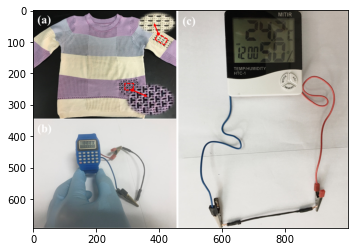

In [19]:
liion = os.path.join(PHYSCHEM, 'liion')
os.chdir(liion)
liions = glob.glob("**/sections/*/fig*.xml")
print("liions ", len(liions))


liionpngs = glob.glob("**/pdfimages/**/raw.png")
print("liions pngs", len(liionpngs)) 

import matplotlib.pyplot as plt
%matplotlib inline

import time

# print(liionpngs)
for count, liionpng in enumerate(liionpngs):
    print ("img ", liionpng)
    hocr_file = os.path.join(os.path.split(liionpng)[0], 'hocr.html')
    hocr = pytesseract.image_to_pdf_or_hocr(liionpng, extension='hocr')
    img = Image.open(liionpng)
    plt.imshow(np.asarray(img))
    plt.imshow(img)

    with open(hocr_file, 'w+b') as f:
        f.write(hocr) # hocr
        
    if count >= 4:
        break
#    time.sleep(3)
        